#### 读取并处理自己的数据集

In [3]:
import numpy as np
#python自带的库，主要用于读取和存储图像
import imageio 
#glob是python自带的一个文件操作相关模块，用于查找想要的文件,支持通配符操作
import glob
import matplotlib.pyplot as plt

#定义一个列表，存储自己手写数字的数据
our_own_dataset = []

#对每个自己的手写数字处理，获得MNIST的数据集对应的CSV格式数据，并存储到定义的列表中
for image_file_name in glob.glob('my_own_dataset/2828_my_own_?.png'):
    print("loading...", image_file_name)
    #记录自己手写数字的正确标签
    label = int(image_file_name[-5:-4])
    #将图像数据从png文件加载到数组中
    img_array = imageio.imread(image_file_name, as_gray = True)
    #将28*28的方块数组变成很长的一段数值,正常情况下，像素值：0代表黑色，255代表白色，但MNIST数据集存储的像素值相反。
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0*0.99) + 0.01
    print(np.min(img_data))
    print(np.max(img_data))
    #将标签和对应的数据添加到测试数据中，即我们的数据集
    #np.append(arr,values,axis=None),将value插入到目标arr的后面，values和arr应该具有相同的维度
    record = np.append(label,img_data)
    print(record)
    our_own_dataset.append(record)
    pass

loading... my_own_dataset\2828_my_own_2.png
0.01
1.0
[2.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01     

### 训练测试神经网络

In [4]:
import numpy as np
import scipy.special as S
import matplotlib.pyplot as plt
#python自带的库，主要用于读取和存储图像
import imageio 
#glob是python自带的一个文件操作相关模块，用于查找想要的文件,支持通配符操作
import glob
class neuralNetwork:
#初始化神经网络,构造函数
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #设置每个输入、隐藏、输出层中的节点数
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #链接权重矩阵，wih和who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        #学习率
        self.lr = learningrate
        
        #创建激活函数（函数的另一种定义方法,这样以后可以直接调用）
        self.activation_function = lambda x: S.expit(x)
        
        pass
    
#训练神经网络
    def train(self, inputs_list, targets_list):
        #将输入列表转换成二维数组
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        #将输入信号计算到隐藏层
        hidden_inputs = np.dot(self.wih, inputs)
        #计算隐藏层中输出的信号(使用激活函数计算)
        hidden_outputs = self.activation_function(hidden_inputs)
        #将传输的信号计算到输出层
        final_inputs = np.dot(self.who, hidden_outputs)
        #计算输出层中输出的信号（使用激活函数）
        final_outputs = self.activation_function(final_inputs)
        
        #计算输出层的误差：（target - actual）(预期目标输出值-实际计算得到的输出值)
        output_errors = targets - final_outputs
        #隐藏层的误差：是输出层误差按权重分割，在隐藏节点上重新组合
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #反向传播，更新各层权重
        #更新隐层和输出层之间的权重
        self.who += self.lr*np.dot((output_errors*final_outputs*(1.0 - final_outputs)), np.transpose(hidden_outputs))
        #更新输入层和隐藏层之间的权重
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), np.transpose(inputs))
        #pass一般用于占位置，定义一个空函数程序会报错，当没有想好函数的内容可以用pass填充，使得程序正常运行
        pass
    
#查询神经网络：接受神经网络的输入，返回神经网络的输出
    def query(self, inputs_list):
        #将输入列表转换成二维数组
        inputs = np.array(inputs_list, ndmin = 2).T
        
        #将输入信号计算到隐藏层
        hidden_inputs = np.dot(self.wih, inputs)
        #将信号从隐藏层输出
        hidden_outputs = self.activation_function(hidden_inputs)
        #将信号引入到输出层
        final_inputs = np.dot(self.who, hidden_outputs)
        #将信号从输出层输出
        final_outputs = self.activation_function(final_inputs)
        
        #返回输出层的输出值
        return final_outputs

In [5]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [6]:
 #将mnist的训练数据CSV文件加载到一个列表中
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

[[4.99422509e-04]
 [8.14693459e-04]
 [2.99657285e-01]
 [3.35877214e-04]
 [9.32945082e-01]
 [1.92316981e-03]
 [6.72963967e-03]
 [1.66411612e-03]
 [6.49453811e-05]
 [1.32707294e-03]]
network says  4
match


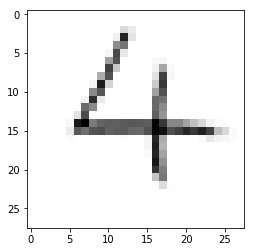

In [7]:
#训练神经网络
#epochs是用于训练数据集的次数，有些人把训练一次叫做一个世代，
epochs = 10
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass
#定义一个列表，存储自己手写数字的数据
our_own_dataset = []
#对每个自己的手写数字处理，获得MNIST的数据集对应的CSV格式数据，并存储到定义的列表中
for image_file_name in glob.glob('my_own_dataset/2828_my_own_?.png'):
    #记录自己手写数字的正确标签
    label = int(image_file_name[-5:-4])
    #将图像数据从png文件加载到数组中
    img_array = imageio.imread(image_file_name, as_gray = True)
    #将28*28的方块数组变成很长的一段数值,正常情况下，像素值：0代表黑色，255代表白色，但MNIST数据集存储的像素值相反。
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0*0.99) + 0.01
    #将标签和对应的数据添加到测试数据中，即我们的数据集
    #np.append(arr,values,axis=None),将value插入到目标arr的后面，values和arr应该具有相同的维度
    record = np.append(label,img_data)
    our_own_dataset.append(record)
    pass


[[2.62499692e-03]
 [1.87309515e-02]
 [1.15237286e-04]
 [6.43846428e-03]
 [2.21301014e-02]
 [8.06269012e-02]
 [6.94051743e-01]
 [2.29251185e-02]
 [4.91861927e-03]
 [3.48890708e-03]]
network says  6
match


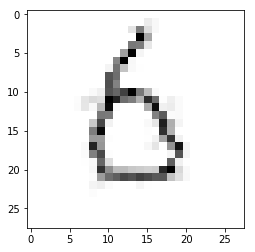

In [16]:
#测试自己的手写数字数据集
item = 4
#显示图片
plt.imshow(our_own_dataset[item][1:].reshape(28,28), cmap = 'Greys', interpolation='None')
correct_label = our_own_dataset[item][0]
inputs = our_own_dataset[item][1:]

outputs = n.query(inputs)
print(outputs)

label = np.argmax(outputs)
print("network says ", label)
if (label == correct_label):
    print("match")
else:
    print("no match")
    pass